In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

data_dir = "~/repos/soilqc_anomaly_detection/data/save_manual/"

%matplotlib inline

# Plot data with shading overlaid to check for labeling errors

In [2]:
save_dir = "../data/sensors/"
df = pd.read_csv(save_dir+"03_A_M2005.csv", index_col="DAY_HOUR")
df.index = [i for i in range(len(df.index.values))]

In [4]:
anom_idxs = df.label[df.label == 1].index.values
anom_shading_regions = [
    (i-1, i+1) for i in anom_idxs
]

In [5]:
precip_idxs = df.precip[df.precip> 0].index.values
precip_shading_regions = [
    (i-1, i+1) for i in precip_idxs
]

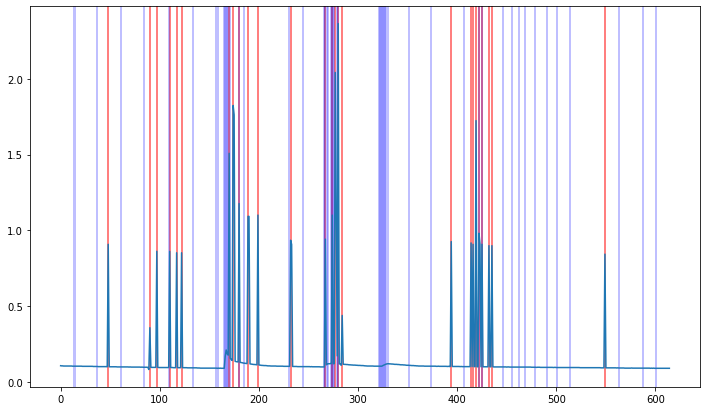

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))
ax.plot(df.raw)
for anom in anom_shading_regions:
    ax.axvspan(anom[0], anom[1], facecolor="r", alpha=0.5)
for precip in precip_shading_regions:
    ax.axvspan(precip[0], precip[1], facecolor="b", alpha=0.25)

In [14]:
df.label[df.label == 1].index.values

array([ 48,  90,  97, 110, 117, 122, 170, 174, 180, 189, 199, 232, 267,
       274, 277, 280, 284, 394, 414, 416, 419, 422, 425, 432, 435, 549])

In [20]:
idx_start = 150
idx_stop = 250

df_plot = df.iloc[idx_start:idx_stop]

df_plot.index = [i for i in range(len(df_plot.index.values))]

anom_idxs = df_plot.label[df_plot.label == 1].index.values
anom_shading_regions = [
    (i-1, i+1) for i in anom_idxs
]

precip_idxs = df_plot.precip[df_plot.precip> 0].index.values
precip_shading_regions = [
    (i-1, i+1) for i in precip_idxs
]

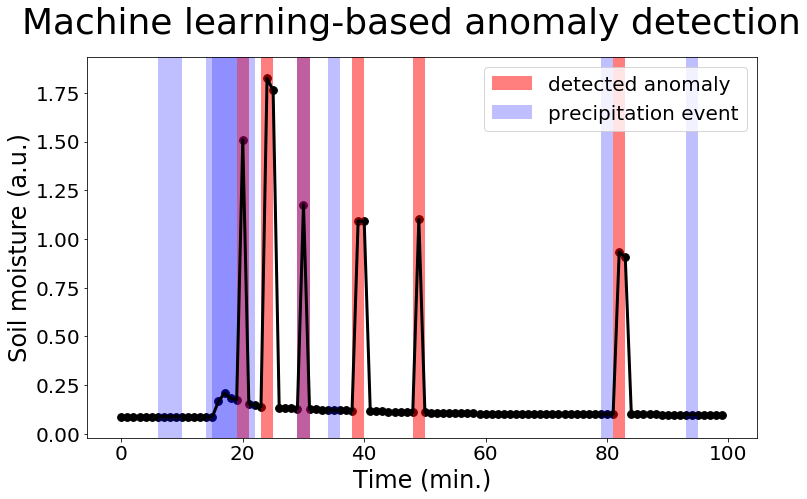

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

ax.plot(df_plot.raw, c="black", linewidth=3)
ax.scatter(df_plot.index.values, df_plot.raw, c="black", s=60)

for anom in anom_shading_regions[:-1]:
    ax.axvspan(anom[0], anom[1], facecolor="r", alpha=0.5)
anom = anom_shading_regions[-1]
ax.axvspan(anom[0], anom[1], facecolor="r", alpha=0.5, label="detected anomaly")

for precip in precip_shading_regions[:-1]:
    ax.axvspan(precip[0], precip[1], facecolor="b", alpha=0.25)
precip = precip_shading_regions[-1]
ax.axvspan(precip[0], precip[1], facecolor="b", alpha=0.25, label="precipitation event")

ax.set_xlabel("Time (min.)", fontsize=24)
ax.set_ylabel("Soil moisture (a.u.)", fontsize=24)
ax.tick_params(axis="both", which="major", labelsize=20)
ax.legend(fontsize=20)

fig.suptitle("Machine learning-based anomaly detection", fontsize=36)

fig.savefig("anomaly_detection_mockup.pdf")

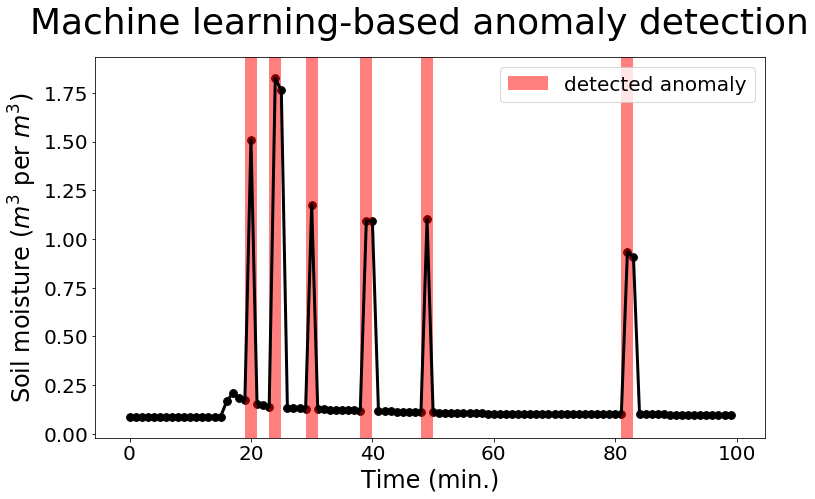

In [53]:
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

ax.plot(df_plot.raw, c="black", linewidth=3)
ax.scatter(df_plot.index.values, df_plot.raw, c="black", s=60)

for anom in anom_shading_regions[:-1]:
    ax.axvspan(anom[0], anom[1], facecolor="r", alpha=0.5)
anom = anom_shading_regions[-1]
ax.axvspan(anom[0], anom[1], facecolor="r", alpha=0.5, label="detected anomaly")

ax.set_xlabel("Time (min.)", fontsize=24)
ax.set_ylabel("Soil moisture ($m^{3}$ per $m^{3}$)", fontsize=24)
ax.tick_params(axis="both", which="major", labelsize=20)
ax.legend(fontsize=20)

fig.suptitle("Machine learning-based anomaly detection", fontsize=36)

fig.savefig("anomaly_detection_mockup_NOPRECIP.pdf")